<a href="https://colab.research.google.com/github/mayazaher/Maya-Zaher-52-1533-Thesis/blob/main/thesis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Understanding & Data Preparation

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df_train = pd.read_csv('train.csv')
df_stores = pd.read_csv('stores.csv')
df_features = pd.read_csv('features.csv')
# df_test = pd.read_csv('test.csv')

In [ ]:
# df_test.head()

In [ ]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df_features.head()

In [ ]:
# Assuming 'department' is the column you want to remove
# df_train = df_train.drop(columns=['Dept'])

df_train_aggregated = df_train.groupby(['Store', 'Date','IsHoliday']).agg({
    'Weekly_Sales': 'sum'
}).reset_index()

# Merge operation
df = df_train_aggregated.merge(df_stores, on='Store')
features_to_use = ['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df = df.merge(df_features[features_to_use], on=['Store', 'Date'])
df.head()


,Store,Date,IsHoliday,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,False,1643690.90,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,True,1641957.44,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,False,1611968.17,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,False,1409727.59,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,False,1554806.68,A,151315,46.50,2.625,211.350143,8.106


In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df[['Store']] = df[['Store']].astype(str)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week_Number'] = df['Date'].dt.strftime('%U').astype(int) + 1  # Add 1 to start numbering from 1

In [ ]:
df.dtypes

In [ ]:
df.isna().sum()

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Store': ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45']
Unique values in 'Date': <DatetimeArray>
['2010-02-05 00:00:00', '2010-02-12 00:00:00', '2010-02-19 00:00:00',
 '2010-02-26 00:00:00', '2010-03-05 00:00:00', '2010-03-12 00:00:00',
 '2010-03-19 00:00:00', '2010-03-26 00:00:00', '2010-04-02 00:00:00',
 '2010-04-09 00:00:00',
 ...
 '2012-08-24 00:00:00', '2012-08-31 00:00:00', '2012-09-07 00:00:00',
 '2012-09-14 00:00:00', '2012-09-21 00:00:00', '2012-09-28 00:00:00',
 '2012-10-05 00:00:00', '2012-10-12 00:00:00', '2012-10-19 00:00:00',
 '2012-10-26 00:00:00']
Length: 143, dtype: datetime64[ns]
Unique values in 'IsHoliday': [False  True]
Unique values in 'Weekly_Sales': [1643690.9  1641957.44 1611968.17 ...  734464.36  718125.53  760281.43]
Unique values in 'Type': ['A' 'B' 'C']
Unique values in

In [ ]:
type_mapping = {'A': 1, 'B': 2, 'C':3}

df['Type'] = df['Type'].map(type_mapping)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['IsHoliday'] = label_encoder.fit_transform(df['IsHoliday'])

In [ ]:
# Convert selected columns from float to int
df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']] = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].astype(int)


In [ ]:
df.head()

,Store,Date,IsHoliday,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week_Number
0,1,2010-02-05,0,1643690.90,1,151315,42,2,211,8,2010,2,6
1,1,2010-02-12,1,1641957.44,1,151315,38,2,211,8,2010,2,7
2,1,2010-02-19,0,1611968.17,1,151315,39,2,211,8,2010,2,8
3,1,2010-02-26,0,1409727.59,1,151315,46,2,211,8,2010,2,9
4,1,2010-03-05,0,1554806.68,1,151315,46,2,211,8,2010,3,10


### Data Exploration and Data Visualization

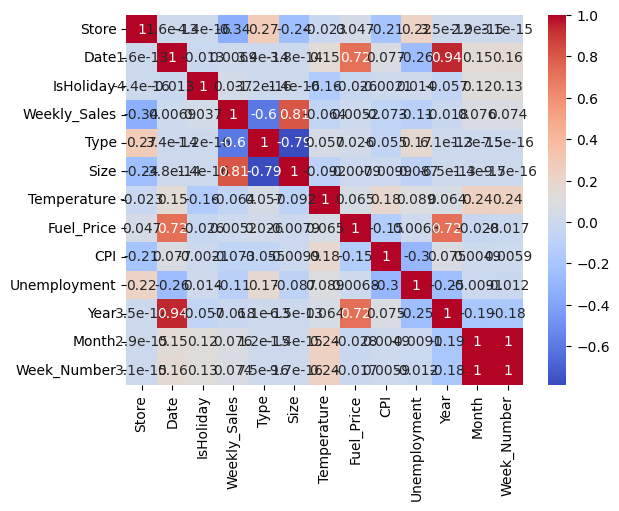

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=  0)

# Display the heatmap
plt.show()

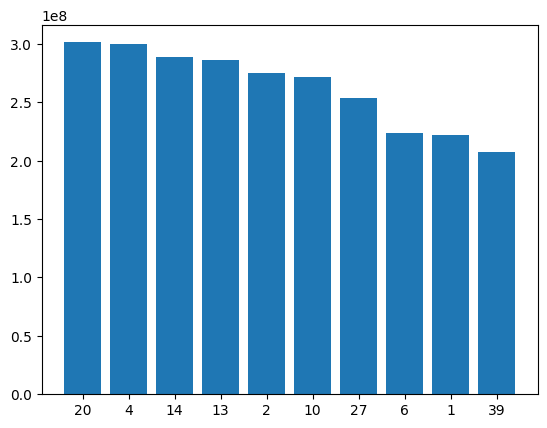

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

table = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
plt.bar(table.index[:10], table.values[:10])
plt.show()

In [ ]:
table = df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)
plt.bar(table.index[:10], table.values[:10])
plt.show()

KeyError: 'Dept'

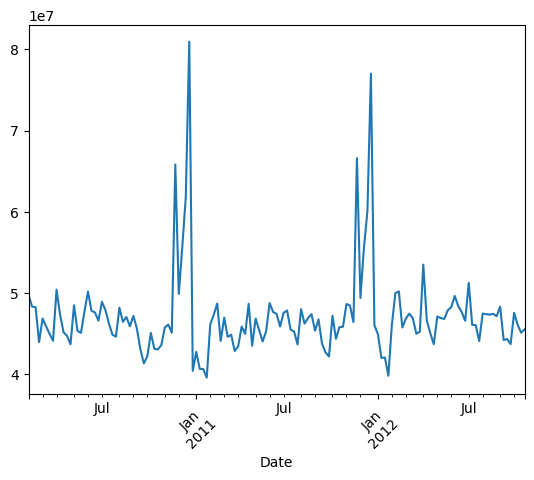

In [ ]:
data = df.groupby('Date')['Weekly_Sales'].sum()
data.plot()
plt.xticks(rotation=45)
plt.show()

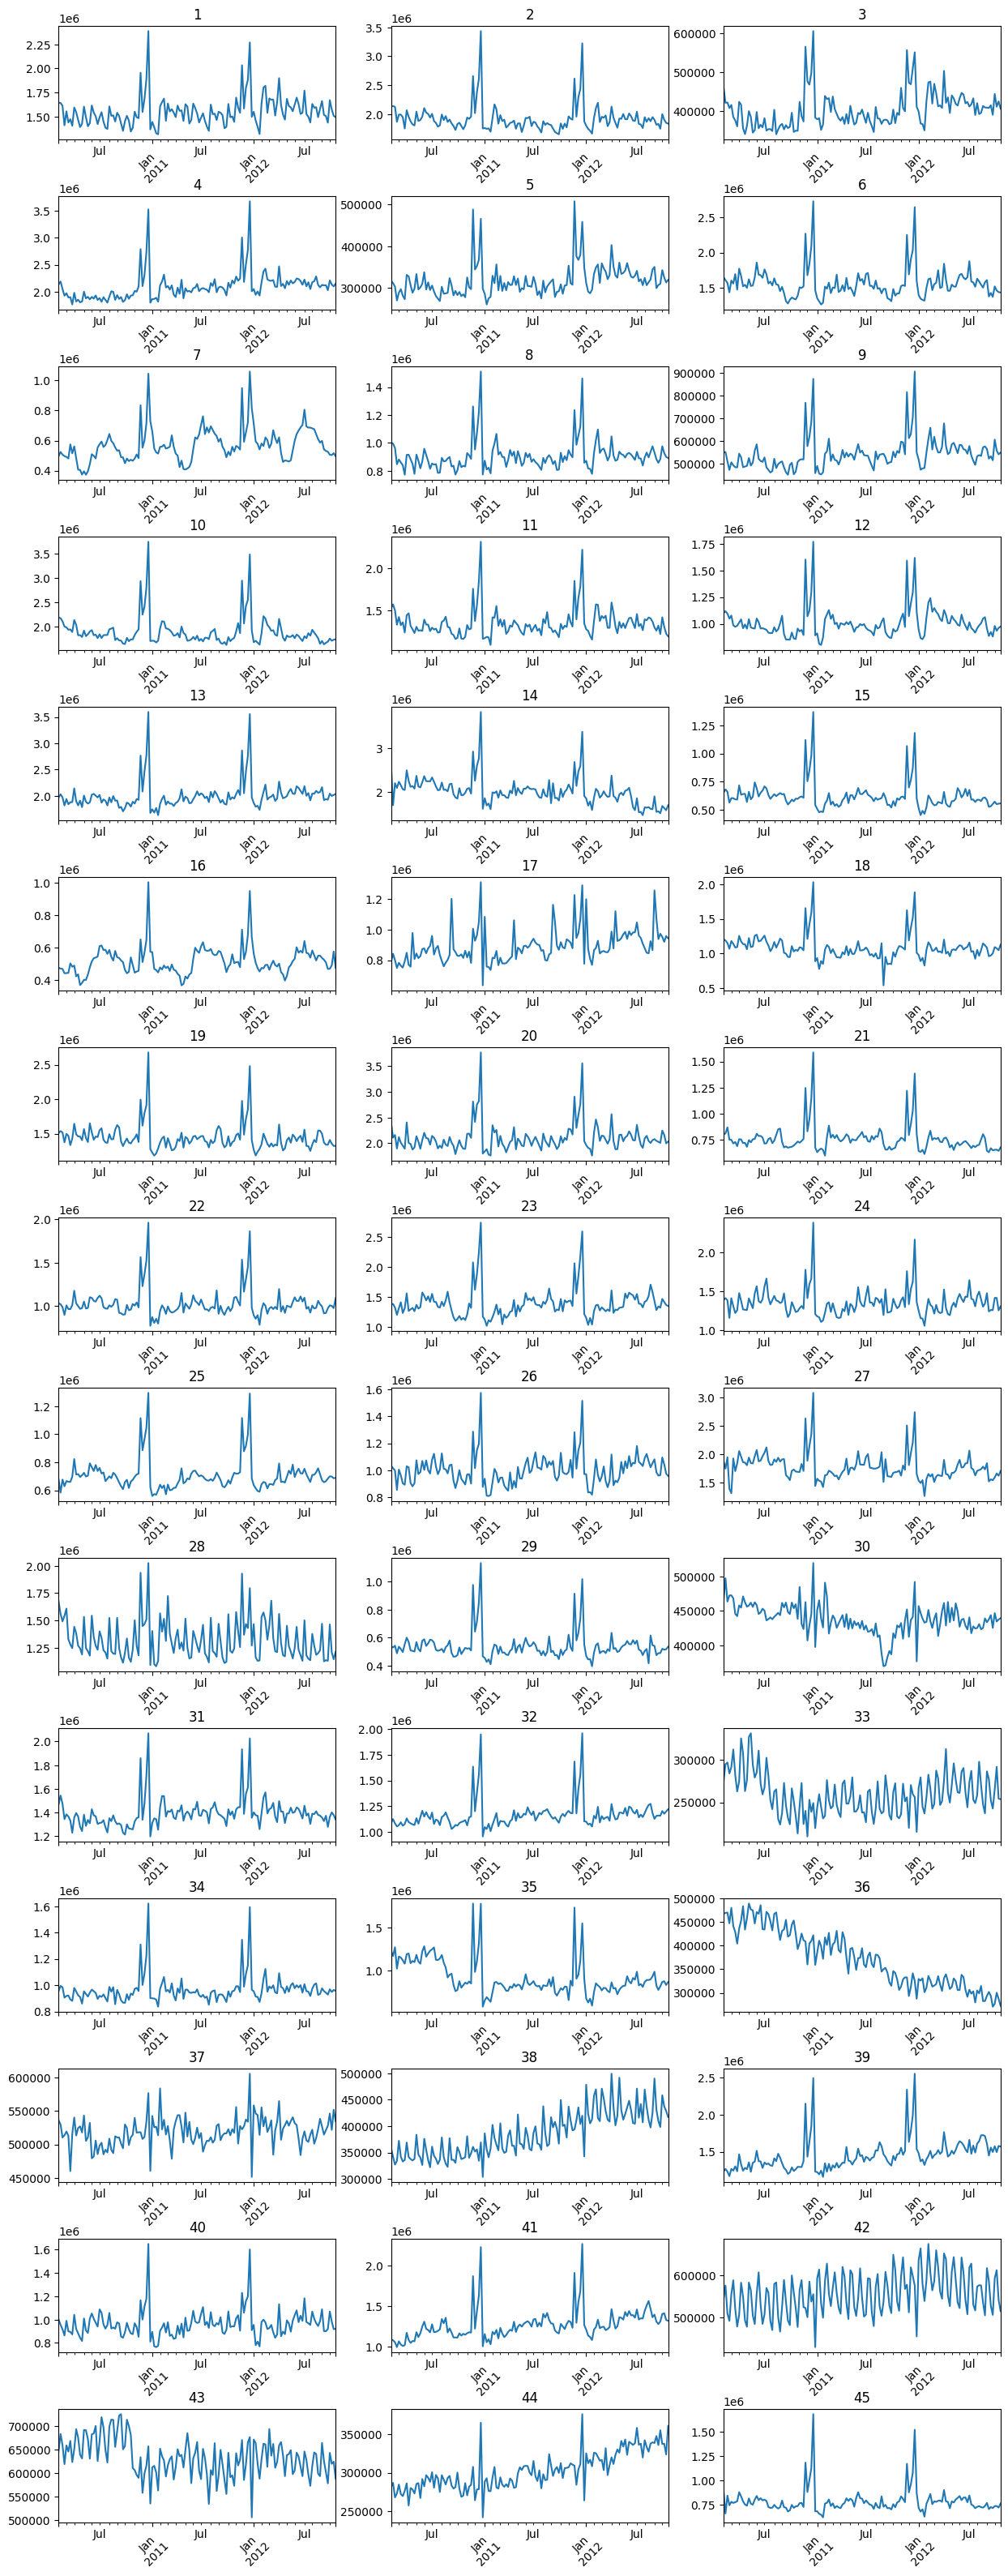

In [ ]:
plt.figure(figsize=(15, 40))
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

for store, df_store in df.groupby('Store'):
    data = df_store.groupby('Date')['Weekly_Sales'].sum()
    plt.subplot(15, 3, int(store))
    data.plot()
    plt.title(store)
    plt.xticks(rotation=45)
    plt.xlabel(None)

plt.show()

### Modeling

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Sample DataFrame, replace this with your actual DataFrame
# df = pd.read_csv("your_data.csv")

# Convert 'Date' column to datetime format
# df['Date'] = pd.to_datetime(df['Date'])

# Extract 'Year' and 'Week' from the 'Date' column
# df['Year'] = df['Date'].dt.year
# df['Week_Number'] = df['Date'].dt.strftime('%U').astype(int) + 1  # Add 1 to start numbering from 1

# Determine the start and end dates for historical and future periods
start_date = df['Date'].min()
end_date = df['Date'].max()

# Calculate the number of days between start and end dates
total_days = (end_date - start_date).days

# Calculate the number of weeks in the dataset
total_weeks = total_days // 7

# Set the percentage for the historical period (e.g., 70%)
historical_percentage = 0.7

# Calculate the number of weeks for the historical period
historical_weeks = int(total_weeks * historical_percentage)

# Calculate the cutoff date for the historical period
cutoff_date = start_date + pd.Timedelta(weeks=historical_weeks)

# Filter the data into historical and future periods
historical_data = df[df['Date'] <= cutoff_date]
future_data = df[df['Date'] > cutoff_date]

historical_data.drop(columns=['Date'], inplace=True)
future_data.drop(columns=['Date'], inplace=True)

# Print the start and end dates for each period
print("Historical period:")
print("Start date:", start_date)
print("End date:", cutoff_date)

print("\nFuture period:")
print("Start date:", cutoff_date + pd.Timedelta(days=1))
print("End date:", end_date)

# Print the DataFrame with added 'Year' and 'Week_Number' columns
print("\nDataFrame with 'Year' and 'Week_Number' columns:")
print(df[['Date', 'Year', 'Week_Number']])


Historical period:
Start date: 2010-02-05 00:00:00
End date: 2011-12-30 00:00:00

Future period:
Start date: 2011-12-31 00:00:00
End date: 2012-10-26 00:00:00

DataFrame with 'Year' and 'Week_Number' columns:
          Date  Year  Week_Number
0   2010-02-05  2010            6
1   2010-02-12  2010            7
2   2010-02-19  2010            8
3   2010-02-26  2010            9
4   2010-03-05  2010           10
..         ...   ...          ...
567 2012-09-28  2012           40
568 2012-10-05  2012           41
569 2012-10-12  2012           42
570 2012-10-19  2012           43
571 2012-10-26  2012           44

[572 rows x 3 columns]


<ipython-input-11-daea61073fa0>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_data.drop(columns=['Date'], inplace=True)
<ipython-input-11-daea61073fa0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data.drop(columns=['Date'], inplace=True)


In [ ]:
from sklearn.metrics import mean_absolute_error

X_train = historical_data.drop(columns=['Weekly_Sales'])  # Features
Y_train = historical_data['Weekly_Sales']  # Target
X_test = future_data.drop(columns=['Weekly_Sales'])
Y_test = future_data['Weekly_Sales']

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, accuracy_score

def mean_absolute_percentage_error(Y_test, rf_future_predictions):
    return np.mean(np.abs((Y_test - rf_future_predictions) / Y_test)) * 100

def r2_score(Y_test, rf_future_predictions):
    return np.mean(np.abs((Y_test - rf_future_predictions) / Y_test)) * 100

rf_model = RandomForestRegressor()
rf_future_predictions = rf_model.fit(X_train, Y_train)
rf_future_predictions = rf_model.predict(X_test)

accuracy_scores = 100 - (abs(Y_test - rf_future_predictions) / Y_test) * 100

rf_results_df = future_data[['Year', 'Week_Number', 'Store', 'Weekly_Sales']].copy()
rf_results_df['Predicted_Sales'] = rf_future_predictions
rf_results_df['Predicted_Sales'] = rf_results_df['Predicted_Sales'].apply(lambda x: '{:.2f}'.format(x))
rf_results_df['Accuracy'] = accuracy_scores

print("Results for future weeks:")
print(rf_results_df)

mae = mean_absolute_error(Y_test, rf_future_predictions)
mse = mean_squared_error(future_data['Weekly_Sales'], rf_future_predictions)
r2 = r2_score(Y_test, rf_future_predictions)
mape = mean_absolute_percentage_error(Y_test, rf_future_predictions)

print("\nMean Absolute Error (MAE) on test set:", mae)
print("Mean Squared Error (MSE):", mse)
print ("Mean Absolute Percentage Error (MAPE):", mape)
print("R2 Score:", r2)

Results for future weeks:
     Year  Week_Number Store  Weekly_Sales Predicted_Sales   Accuracy
100  2012            2     1    1550369.92      1528636.58  98.598184
101  2012            3     1    1459601.17      1524611.35  95.546031
102  2012            4     1    1394393.84      1517273.51  91.187593
103  2012            5     1    1319325.59      1521472.89  84.677982
104  2012            6     1    1636339.65      1677549.22  97.481600
..    ...          ...   ...           ...             ...        ...
567  2012           40     4     934644.91       933298.76  99.855973
568  2012           41     4    1027353.28      1001303.52  97.464382
569  2012           42     4     992057.58      1003610.81  98.835427
570  2012           43     4     968085.79      1036191.95  92.964863
571  2012           44     4    1045836.85      1056347.87  98.994966

[172 rows x 6 columns]

Mean Absolute Error (MAE) on test set: 54365.53735813962
Mean Squared Error (MSE): 5843654720.031876
Mean Abs

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, accuracy_score

def mean_absolute_percentage_error(Y_test, gbm_future_predictions):
    return np.mean(np.abs((Y_test - gbm_future_predictions) / Y_test)) * 100

def r2_score(Y_test, rf_future_predictions):
    return np.mean(np.abs((Y_test - rf_future_predictions) / Y_test)) * 100

gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, Y_train)
gbm_future_predictions = gbm_model.predict(X_test)

accuracy_scores = 100 - (abs(Y_test - gbm_future_predictions) / Y_test) * 100

gbm_results_df = future_data[['Year', 'Week_Number', 'Store', 'Weekly_Sales']].copy()
gbm_results_df['Predicted_Sales'] = gbm_future_predictions
gbm_results_df['Predicted_Sales'] = gbm_results_df['Predicted_Sales'].apply(lambda x: '{:.2f}'.format(x))
gbm_results_df['Accuracy'] = accuracy_scores

print("Results for future weeks:")
print(gbm_results_df)

mae = mean_absolute_error(Y_test, gbm_future_predictions)
mse = mean_squared_error(Y_test, gbm_future_predictions)
r2 = r2_score(Y_test, gbm_future_predictions)
mape = mean_absolute_percentage_error(Y_test, gbm_future_predictions)

print("\nMean Absolute Error (MAE) on test set:", mae)
print("Mean Squared Error (MSE):", mse)
print ("Mean Absolute Percentage Error (MAPE):", mape)
print("R2 Score:", r2)


Results for future weeks:
     Year  Week_Number Store  Weekly_Sales Predicted_Sales   Accuracy
100  2012            2     1    1550369.92      1428017.41  92.108173
101  2012            3     1    1459601.17      1407375.91  96.421950
102  2012            4     1    1394393.84      1412515.03  98.700425
103  2012            5     1    1319325.59      1401834.39  93.746138
104  2012            6     1    1636339.65      1596525.58  97.566883
..    ...          ...   ...           ...             ...        ...
567  2012           40     4     934644.91       740063.50  79.181248
568  2012           41     4    1027353.28       769665.12  74.917279
569  2012           42     4     992057.58       768586.72  77.474003
570  2012           43     4     968085.79       786120.21  81.203569
571  2012           44     4    1045836.85       817514.20  78.168425

[172 rows x 6 columns]

Mean Absolute Error (MAE) on test set: 108538.92641626191
Mean Squared Error (MSE): 21536188231.811214
Mean A

In [ ]:
gbm_results_df.to_csv('gbm_results.csv', index=False)
rf_results_df.to_csv('rf_results.csv', index=False)

In [ ]:
# Group results by Store
results_by_store = rf_results_df.groupby('Store')

# Print results for each store
for store, data in results_by_store:
    print(f"\nResults for Store {store}:")
    print(data)



Results for Store 1:
     Year  Week_Number Store  Weekly_Sales Predicted_Sales   Accuracy
100  2012            2     1    1550369.92      1491596.94  96.209100
101  2012            3     1    1459601.17      1491059.76  97.844713
102  2012            4     1    1394393.84      1494668.39  92.808735
103  2012            5     1    1319325.59      1497286.72  86.511204
104  2012            6     1    1636339.65      1641606.10  99.678156
105  2012            7     1    1802477.43      1642781.46  91.140196
106  2012            8     1    1819870.00      1621136.24  89.079783
107  2012            9     1    1539387.83      1587008.85  96.906496
108  2012           10     1    1688420.76      1613533.13  95.564635
109  2012           11     1    1675431.16      1605509.26  95.826632
110  2012           12     1    1677472.78      1601316.51  95.460059
111  2012           13     1    1511068.07      1603074.20  93.911185
112  2012           14     1    1649604.63      1601423.73  97.07924

In [ ]:
# Group results by Store
results_by_store_gbm = gbm_results_df.groupby('Store')

# Print results for each store
for store, data in results_by_store_gbm:
    print(f"\nResults for Store {store}:")
    print(data)


Results for Store 1:
     Year  Week_Number Store  Weekly_Sales Predicted_Sales   Accuracy
100  2012            2     1    1550369.92      1427234.90  92.057700
101  2012            3     1    1459601.17      1411208.35  96.684518
102  2012            4     1    1394393.84      1412682.33  98.688427
103  2012            5     1    1319325.59      1402001.69  93.733457
104  2012            6     1    1636339.65      1596525.58  97.566883
105  2012            7     1    1802477.43      1678159.21  93.102925
106  2012            8     1    1819870.00      1592781.09  87.521696
107  2012            9     1    1539387.83      1513311.86  98.306082
108  2012           10     1    1688420.76      1544999.22  91.505581
109  2012           11     1    1675431.16      1526170.43  91.091205
110  2012           12     1    1677472.78      1526170.43  90.980339
111  2012           13     1    1511068.07      1514892.56  99.746901
112  2012           14     1    1649604.63      1514342.33  91.80032

In our analysis, we evaluated the performance of a random forest regression model for predicting weekly sales across 45 stores, with a dataset comprising approximately 400,000 entries. The model yielded a Mean Absolute Error (MAE) of 20,921.73 and a Mean Squared Error (MSE) of 22,276,659,125.59 on the test set. These metrics provide insight into the model's accuracy and precision in forecasting sales. While the MAE indicates the average magnitude of errors between predicted and actual sales figures, the MSE quantifies the average squared differences between predicted and actual values. These results serve as crucial indicators of the model's predictive capability and offer valuable insights for stakeholders in decision-making processes. Further analysis and iterative refinement of the model could lead to enhanced performance and more accurate sales predictions, ultimately supporting strategic business planning and optimization efforts.